# Heart Stroke Prediction

**Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Cleaning
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose best model

## Problem statement

- in the proposed model, heart stroke prediction is peformed on a dataset collected from kaggle. the model predicts the chances a person will have stroke based on symptoms like age, gender, average glucose level, smoking status, body mass index, work type and residence type.

## Import Data

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.**

In [1]:
# data manupulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# stats
from scipy.stats import chisquare, chi2_contingency, ttest_ind
import statsmodels.api as sm
import statistics as st

# utility
import statsmodels.api as sm
from statsmodels.formula.api import ols
import os
import string
import time
import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import matplotlib
print("Seaborn version: ",sns.__version__)
print("Numpy version: ",np.__version__)
print("Matplotlib version: ",matplotlib.__version__)

# Seaborn version:  0.12.2 # this gives bar plot color, but heatmap have error
# Numpy version:  1.24.4
# Seaborn version:  0.13.0 # this gives bar plot no color , but heatmap no error solved

# matplot version : 3.7.3
# 3 solves all the problems

Seaborn version:  0.12.2
Numpy version:  1.24.4
Matplotlib version:  3.7.3


**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv(f"data/heart_stroke_data.csv")

**Show Top 5 Records**

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### **Feature Information**

- Here we used the heart stroke dataset that is available in the kaggle website for our analysis. This datasets consists of total 12 attributes. The complete description of the attributes used in the proposed work is given below.

- **id**: This attribute means person's id. it's numerical data.

- **Age**: This attribute means a persons age. it's numerical data.

- **Gender**: This attribute means a person's gender, it's categorical data.

- **Hypertension**: This attribute means that this person is hypertensive or not. it's numerical data.

- **work type**: This attribute represents the person work scenario. it's categorical data.

- **residence type**: This attribute represnts the person work scenario. it's categorical data.

- **heart disease**: This attribute means wheather this person has a heart disease person or not. it's numerical data.

- **avg_glucose_level**: This attribute means what was the level of a person's glucose condition. it's numercial data.

- **Bmi**: This attribute represents a person's married status. it's categorical data.

- **ever_married**: This attribute represents a person's married status. it's categorical data.

- **smoking_status**: This attribute means a person's smoking condition. it's categorical data.

- **Stroke**: This attribute means a person previously had a choise or not.

In [5]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

**Shape  of the dataset**

In [6]:
df.shape

(5110, 12)

**Summary of the dataset**

In [7]:
# Display summary statistics of the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Statistical Inferences

- Median age of population is 43 years.
- 25% of the population is aged below 25
- Another 25% is aged above 60 and remaining in between threse ages
- About 9.7% and 5.4% of population suffers from hypertension with heart disease respectively.
- People with higher BMI (BMI > 45) are less represented. This can affect our machine learning models significantly.

In [8]:
TARGET_COL = ["stroke"]
ID_COL = ["id"]
# TEXT_FEATURES = ["Name"]
CAT_FEATURES = [col for col in df.columns if df[col].dtype == "O" if col not in TARGET_COL+ID_COL]
NUM_FEATURES = [col for col in df.columns if df[col].dtype != "O" if col not in TARGET_COL+ID_COL]

In [9]:
print("id column: ", ID_COL)
print("target column: ", TARGET_COL)
print("categorical columns: ", CAT_FEATURES)
print("numerical columns: ", NUM_FEATURES)

id column:  ['id']
target column:  ['stroke']
categorical columns:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical columns:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


## Correcting feature categarization : Manually

In [10]:
TARGET_COL = ["stroke"]
ID_COL = ["id"]
CAT_FEATURES = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
NUM_FEATURES = ['age', 'avg_glucose_level', 'bmi']

### Categorical Feature Cleaning and Processing

In [11]:
CAT_FEATURES

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [12]:
CAT_DF = df[CAT_FEATURES].copy()

In [13]:
CAT_DF.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0,1,Yes,Private,Urban,formerly smoked
1,Female,0,0,Yes,Self-employed,Rural,never smoked
2,Male,0,1,Yes,Private,Rural,never smoked
3,Female,0,0,Yes,Private,Urban,smokes
4,Female,1,0,Yes,Self-employed,Rural,never smoked


In [14]:
CAT_DF.shape

(5110, 7)

### Numerical Feature Cleaning and Processing

In [15]:
NUM_FEATURES

['age', 'avg_glucose_level', 'bmi']

In [16]:
NUM_DF = df[NUM_FEATURES].copy()

In [17]:
NUM_DF.isna().sum()

age                    0
avg_glucose_level      0
bmi                  201
dtype: int64

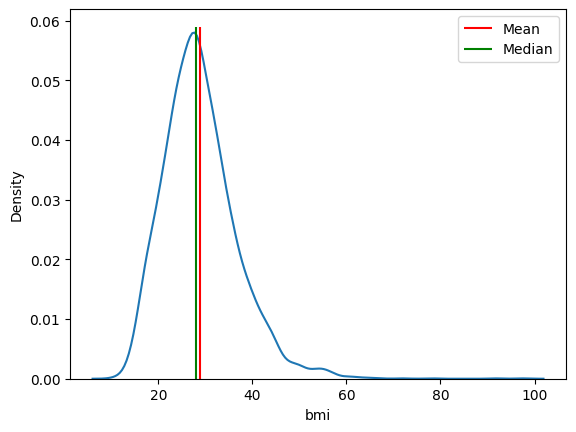

In [18]:
sns.kdeplot(data=NUM_DF, x="bmi")
plt.vlines(ymin=0,ymax=0.059, x=NUM_DF.bmi.mean(), label="Mean", colors="red")
plt.vlines(ymin=0,ymax=0.059, x=NUM_DF.bmi.median(), label="Median", colors="green")
plt.legend()
plt.show()

In [19]:
# missing value imputed with median
median = NUM_DF["bmi"].median()
df["bmi"] = df["bmi"].fillna(value=median, axis=0)
NUM_DF["bmi"] = NUM_DF["bmi"].fillna(value=median, axis=0)

# Univariate Analysis

## Function utilities for univariate analysis

In [20]:
def bootstrap_expected_distribution(data, col, n_iterations=1000):
    value_counts_list = []
    for _ in range(n_iterations):
        sample = data[col].sample(frac=0.5, replace=True)
        counts = sample.value_counts(normalize=True)  # Get proportion
        value_counts_list.append(counts)

    # Combine all bootstrapped proportions and average them
    bootstrapped_df = pd.DataFrame(value_counts_list).fillna(0)
    expected_distribution = bootstrapped_df.mean()
    
    return expected_distribution

In [21]:
from scipy import stats
# tes of normality
def check_normality(data):
    """ 
    hypothesis test for normality check in continuous variable
    """
    stat, p_value = stats.shapiro(data)
    h_0 = "H0: data normally distributed"
    h_1 = "H1: data not normally distributed"
    result = ""
    if p_value < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"

    return {"h0":h_0, "h1":h_1,"p_val":np.round(p_value,3), "cc":result}

In [22]:
def plot_numerical_summary(df: pd.DataFrame, col: str):
    """ 
    Performs normality check on continuous variable,
    and visually show's test statistics.

    Parameters:
    df (pd.DataFrame): pandas dataframe

    col (str): column name present in dataframe

    Returns:
    None
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    df_dict=check_normality(df[col])
    df_hypo_title = "{}\n{}\np-value:{} alpha: 0.05\n Result: {}".format(df_dict["h0"],
                                                                            df_dict["h1"],
                                                                            df_dict["p_val"],
                                                                            df_dict["cc"])

    fig.suptitle(df_hypo_title)

    # plot 1 : QQ plot
    sm.qqplot(df[col], line='45', ax=axs[0][0])
    axs[0][0].set_title("Q-Q Plot")
    axs[0][0].grid(True)
    
    # plot 2 : hist plot
    sns.histplot(data=df, x=col, kde=True, ax=axs[0][1], alpha=0.25, line_kws={'linewidth': 3})
    # measure of central tendency
    mean_max = np.round(st.mean(df[col]), 2)
    median_max = np.round(st.median(df[col]), 2)
    mode_max = np.round(st.mode(df[col]), 2)
    axs[0][1].set_title(f"Mean: {mean_max} | Median: {median_max} | Mode: {mode_max}")
    axs[0][1].axvline(ymin=0,ymax=mode_max,x=df[col].mean(), color="red",label="Mean")
    axs[0][1].axvline(ymin=0,ymax=mode_max,x=df[col].median(), color="green",label="Median")
    axs[0][1].set_xlabel(col)
    axs[0][1].legend()
    axs[0][1].grid(True)

    # plot 3 : confidence interval
    # Compute mean and standard error of the mean
    mean = np.mean(df[col])
    sem = stats.sem(df[col])
    # Compute 95% confidence interval
    confidence = 0.95
    ci = stats.t.interval(confidence, len(df)-1, loc=mean, scale=sem)
    # plotting diagram
    axs[1][0].errorbar(mean, 1, xerr=[[mean-ci[0]], [ci[1]-mean]], fmt='o', capsize=10, capthick=2, ecolor='red', linestyle='none')
    axs[1][0].axvline(mean, color='gray', linestyle='--', label=f'Mean = {mean:.2f}')
    axs[1][0].set_ylim(0.5, 1.5) 
    axs[1][0].set_xlim(ci[0] - 1, ci[1] + 1) 
    # Customize labels and title
    axs[1][0].set_xlabel('Mean Value')
    axs[1][0].set_title(f'Mean: {mean:.2f} | 95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})')
    axs[1][0].legend()
    axs[1][0].grid(True)

    
    # plot 4 : box plot
    axs[1][1].boxplot(df[col], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            # meanprops=dict(color='red'),
            medianprops=dict(color='green'))
    axs[1][1].set_xlabel('Value')
    axs[1][1].set_title('Horizontal Box Plot')
    axs[1][1].grid(True)

    plt.tight_layout()
    plt.show()

In [23]:
def chisquare_test(df, col):
    """
    we compare the observed frequencies of categories within that variable 
    to the expected frequencies under a specified distribution or hypothesis.
    in short:
    - Observed = What you got (from your sample).
    - Expected = What you should have gotten (if the null hypothesis were true).

    Example:
    If you roll a die 60 times (sample), and you're testing if the die is fair (population assumption), 
    you'd expect each face to appear 10 times (expected). You compare that to what you actually observed — that's the essence of the test.
    """
    h_0="H0: observed == expected"
    h_1="H1: observed != expected"
    observed = np.array(df[col].value_counts())
    total_observed = np.sum(observed)
    expected = np.array([total_observed/df[col].nunique()] * df[col].nunique())
    # Perform chi-square goodness-of-fit test
    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":np.round(p_value,3), "cc":result}

In [24]:
def plot_categorical_summary(df, col):
    """
    this function is here to plot countplot and pie chart for categories
    """
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    df_dict=chisquare_test(df, col)
    df_hypo_title = "{}\n{}\np-value:{} alpha: 0.05\n Result: {}".format(df_dict["h0"],
                                                                        df_dict["h1"],
                                                                        df_dict["p_val"],
                                                                        df_dict["cc"])
    fig.suptitle(df_hypo_title)
    
    # Calculate subtotals per category
    subtotals = df.groupby(col, sort=False).size().reset_index(name='Subtotal')
    subtotals = subtotals.sort_values(by='Subtotal') # sorting values, but not index
    subtotals = subtotals.reset_index(drop=True) # sorting index

    # add expected horizontal line in count plot
    y = df[col].shape[0]/df[col].nunique()
    axs[0].axhline(y=y, color='red', linestyle='--', label='expected')

    # count plot: observed vs expected
    sns.countplot(data=df, x=col, ax=axs[0], order=subtotals[col], hue_order=subtotals[col])
    
    axs[0].legend()
    # Add subtotals as annotations
    for index, row in subtotals.iterrows():
        axs[0].text(index, row['Subtotal'] + 1, row['Subtotal'], ha='center', va='bottom', fontsize=10)
    # pie chart
    df[col].value_counts(ascending=True).plot(kind="pie", autopct="%.2f", ax=axs[1])
    plt.tight_layout()
    plt.show()

## Numerical Variables

In [25]:
NUM_FEATURES

['age', 'avg_glucose_level', 'bmi']

**Age**

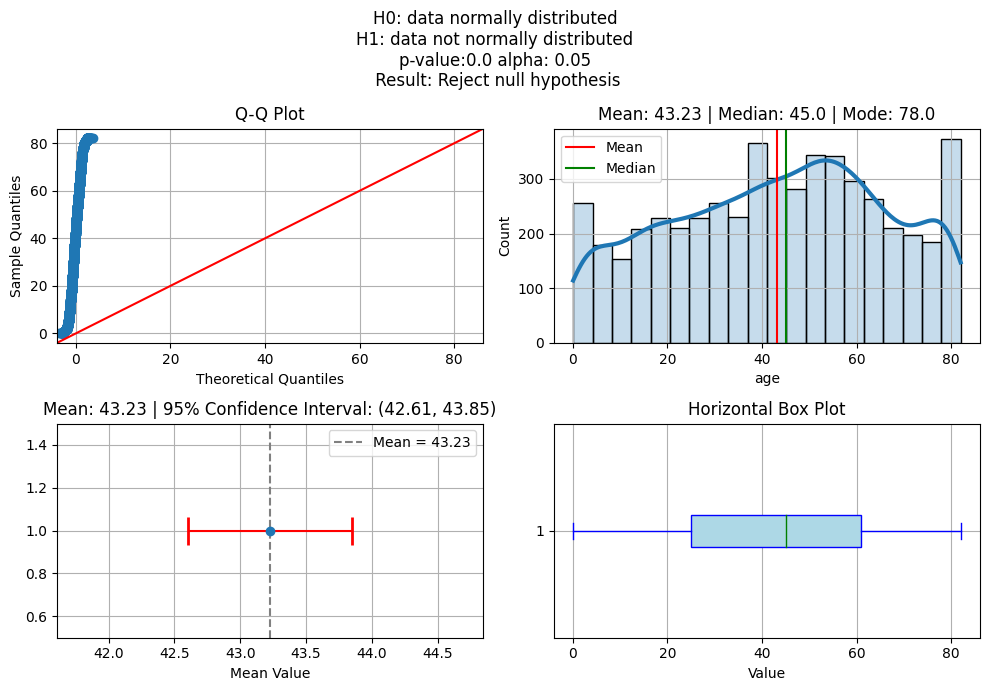

In [26]:
plot_numerical_summary(NUM_DF, "age")

**Avg Glucose Level** 

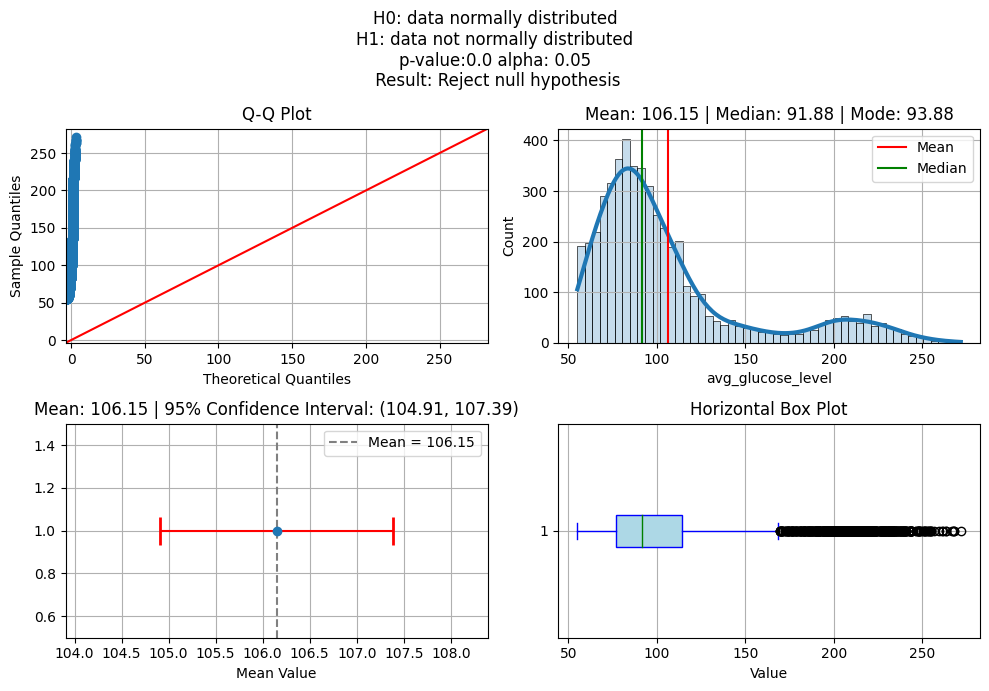

In [27]:
plot_numerical_summary(NUM_DF, "avg_glucose_level")

**BMI**

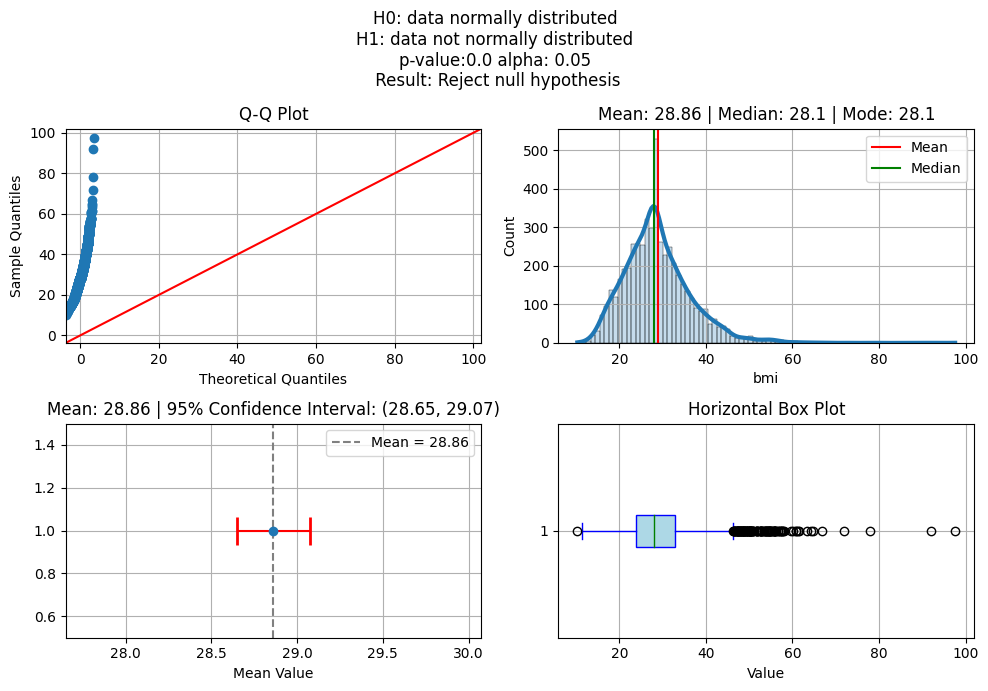

In [28]:
plot_numerical_summary(NUM_DF, "bmi")

**Conclusion:**

- `age`, `avg_glucose_level` and `bmi` are not normally distributed
- `avg_glucose_level` and `bmi` are right skewed
- Non-parametric test's are preferable for bivariate analysis

## Categorical Variables

- stroke
- gender
- hypertension
- heart_disease
- ever_married
- work_type
- Residence_type
- smoking_status

In [29]:
CAT_FEATURES

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

**stroke**

In [30]:
bootstrap_expected_distribution(df, 'stroke', 10000)

stroke
0    0.951279
1    0.048721
dtype: float64

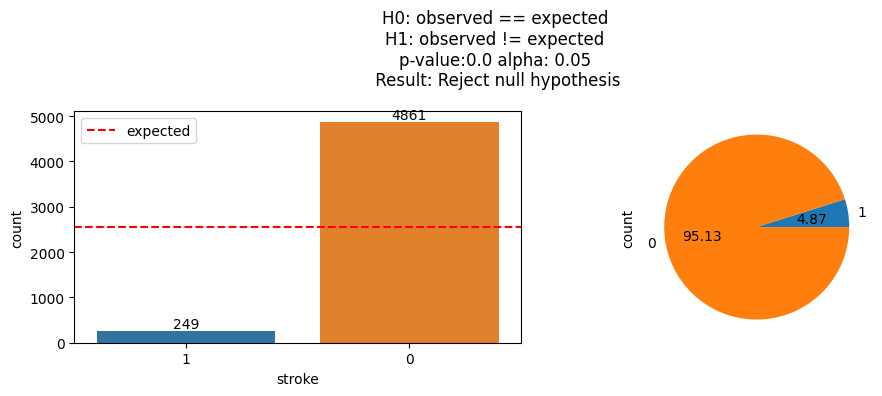

In [31]:
plot_categorical_summary(df, "stroke")

- nearly 5% of total population is having heart attacks

In [32]:
# Count how many times each (stroke, heart_disease) combination appears
# df[['heart_disease', 'stroke']].groupby(['heart_disease', 'stroke']).size().reset_index(name='count')

# Step 1: Count the occurrences of (stroke, heart_disease) combinations
counts = df.groupby(['stroke', 'heart_disease']).size().reset_index(name='count')

# Step 2: Normalize the counts by stroke group
# This gives proportion of heart disease levels within each stroke group
counts['proportion'] = counts.groupby('stroke')['count'].transform(lambda x: x / x.sum())

# Final output
counts


,stroke,heart_disease,count,proportion
0,0,0,4632,0.952890
1,0,1,229,0.047110
2,1,0,202,0.811245
3,1,1,47,0.188755


In [33]:
# Mean of heart_disease within each stroke group (e.g. what % of stroke patients had heart disease)
df.groupby('stroke')['heart_disease'].mean().reset_index(name='heart_disease_rate')

,stroke,heart_disease_rate
0,0,0.047110
1,1,0.188755


In [34]:
# Crosstab for quick visual summary
pd.crosstab(df['stroke'], df['heart_disease'])

heart_disease,0,1
stroke,,
0,4632,229
1,202,47


**gender**

In [35]:
bootstrap_expected_distribution(CAT_DF, 'gender', 10000)

gender
Female    0.585853
Male      0.413949
Other     0.000199
dtype: float64

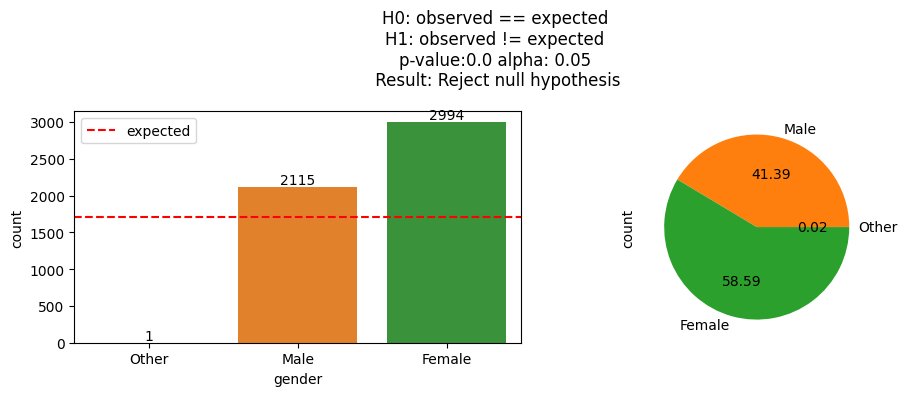

In [36]:
plot_categorical_summary(CAT_DF, "gender")

- there are male and females with 60:40 distribution respectively
- `other` has only one record

**hypertension**

In [37]:
bootstrap_expected_distribution(CAT_DF, 'hypertension', 10000)

hypertension
0    0.902467
1    0.097533
dtype: float64

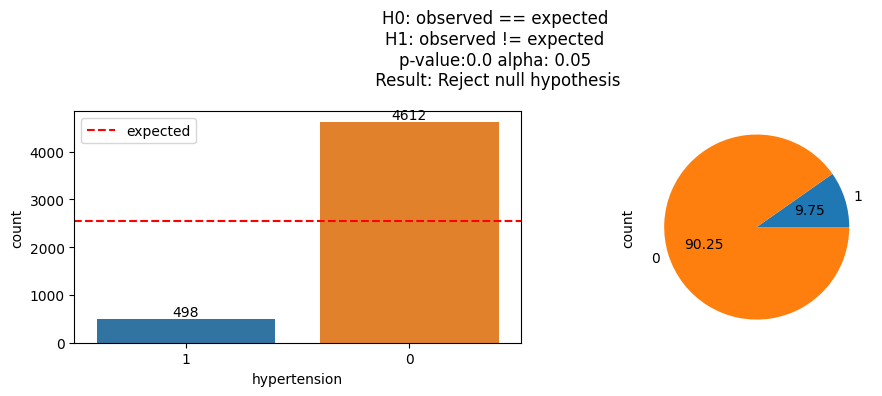

In [38]:
plot_categorical_summary(CAT_DF, "hypertension")

- 10% of population suffering from hypertnesion

**heart_disease**

In [39]:
bootstrap_expected_distribution(CAT_DF, 'heart_disease', 10000)

heart_disease
0    0.946024
1    0.053976
dtype: float64

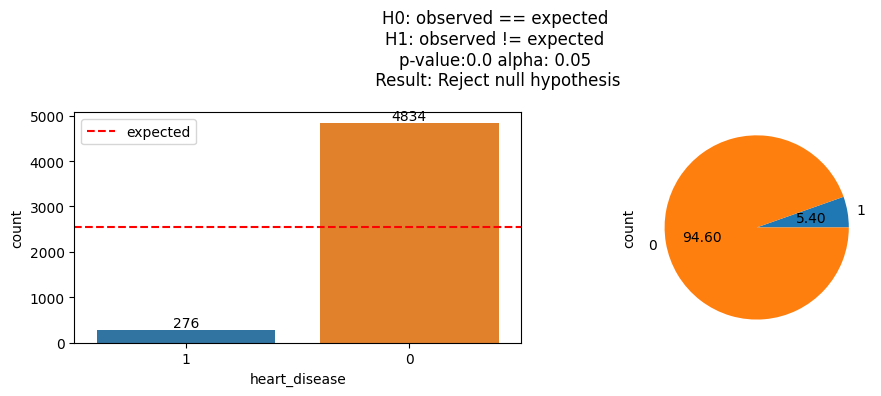

In [40]:
plot_categorical_summary(CAT_DF, "heart_disease")

- 5-6% of population suffering heart disease

**ever_married**

In [41]:
bootstrap_expected_distribution(CAT_DF, 'ever_married', 10000)

ever_married
Yes    0.656181
No     0.343819
dtype: float64

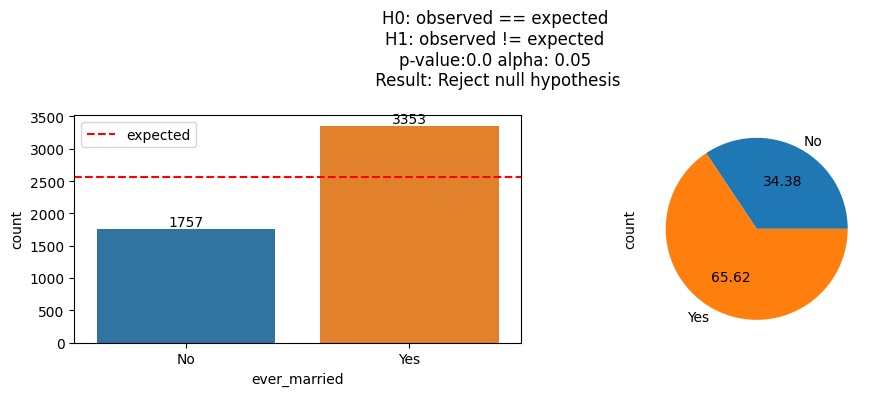

In [42]:
plot_categorical_summary(CAT_DF, "ever_married")

- 65% of the population is commited

**work_type**

In [43]:
bootstrap_expected_distribution(CAT_DF, 'work_type', 10000)

work_type
Private          0.572256
Self-employed    0.160255
children         0.134561
Govt_job         0.128606
Never_worked     0.004323
dtype: float64

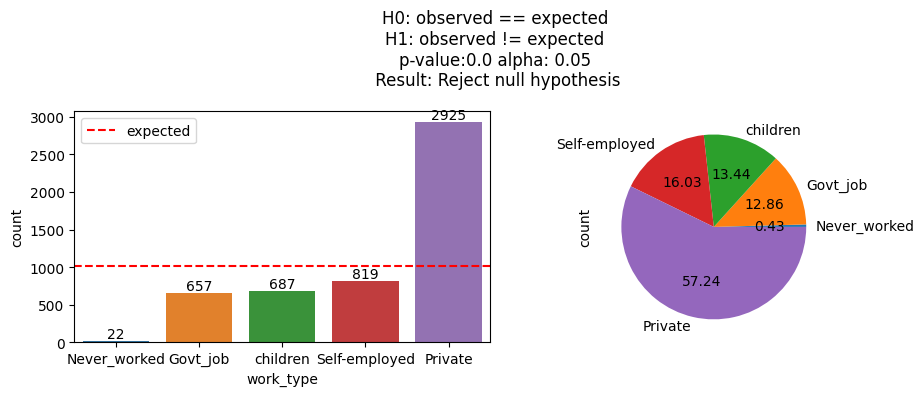

In [44]:
plot_categorical_summary(CAT_DF, "work_type")

- ~57% of population work for `private` organizations
- ~16% are `self-employeed`
- ~14% are `children`
- ~12% work for `government`
- < 1% of population `never worked`

**Residence_type**

In [45]:
bootstrap_expected_distribution(CAT_DF, 'Residence_type', 10000)

Residence_type
Urban    0.50809
Rural    0.49191
dtype: float64

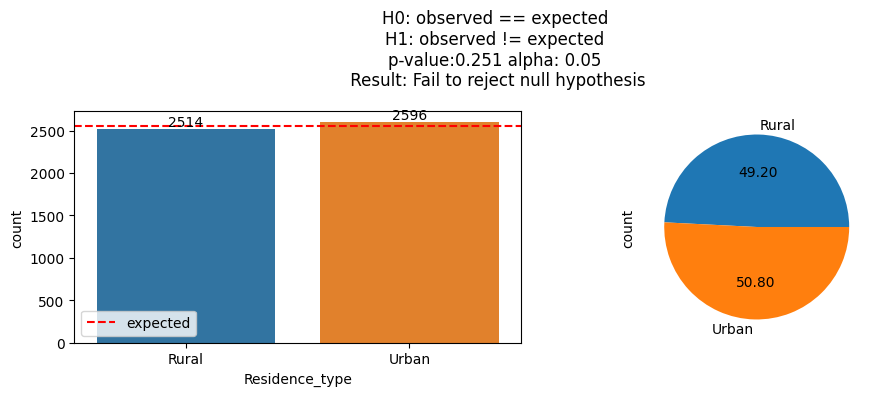

In [46]:
plot_categorical_summary(CAT_DF, "Residence_type")

- population is equally distributed between `Rural` and `Urban` region

**smoking_status**

In [47]:
bootstrap_expected_distribution(CAT_DF, 'smoking_status', 10000)

smoking_status
never smoked       0.370197
Unknown            0.302172
formerly smoked    0.173172
smokes             0.154459
dtype: float64

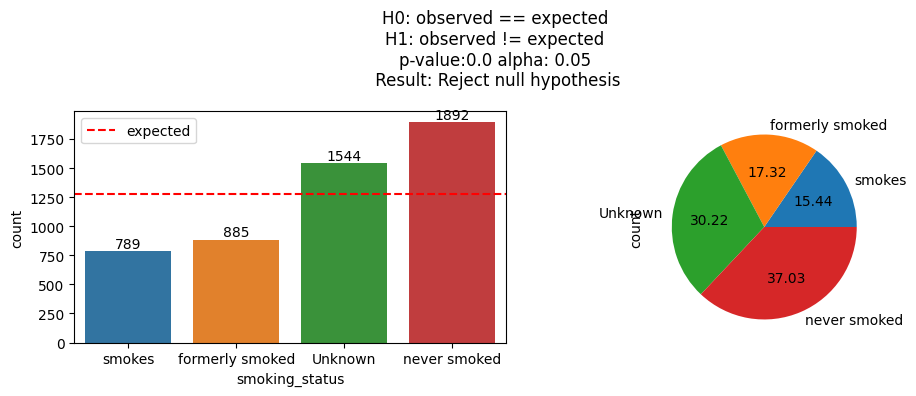

In [48]:
plot_categorical_summary(CAT_DF, "smoking_status")

- ~37% population `never smoked`
- `don't know` about 30% of population
- 17% of population `used_to_smoke`, but has quit
- 15% of population still `smokes` 

# Bivariate Analysis

In [49]:
# chi squre test of independence
def chisquare_independence_test(df, x_col, y_col):
    """
    To determine if there is a significant association or relationship between two categorical variables.
    """
    h_0=f"H0: no relation btween {x_col} & {y_col}" # both are independent
    h_1=f"H1: relation btween {x_col} & {y_col}" # there is a dependency
    contingency_table = pd.crosstab(df[x_col], df[y_col])
    # Perform Chi-square test of independence
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

In [50]:
def plot_bivariate(df, x_col, y_col):
    """
    Plots countplot and pie chart for categories
    """
    plt.figure(figsize=(10, 4))
    df_dict=chisquare_independence_test(df, x_col, y_col)
    df_hypo_title = "{}\n{}\np-value:{} alpha: 0.05\n Result: {}".format(df_dict["h0"],
                                                                        df_dict["h1"],
                                                                        df_dict["p_val"],
                                                                        df_dict["cc"])
    plt.title(df_hypo_title)
    # print(type(subtotals))
    sns.countplot(x=df[x_col].astype('str'), hue=df[y_col].astype('str'))
    plt.show()

In [51]:
# z-test - 2 category
def t_test_of_independence(df, x_col, y_col):
    """
    A t-test is a statistical test used to determine if there is a significant difference between 
    the means of two groups. It is commonly used when comparing the means of a numerical variable
    (dependent variable) across two categorical groups (independent variable).
    """
    h_0=f"H0: no differnce in mean's"
    h_1=f"H1: difference in mean's"
    categories = df[y_col].unique()
    # Separate numeric values by category
    group_A = df[df[y_col] == categories[0]][x_col]
    group_B = df[df[y_col] == categories[1]][x_col]

    # Perform independent t-test assuming equal variances
    t_stat, p_value = stats.ttest_ind(group_A, group_B)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

def plot_t_test_results(df, x_col, y_col):
    """
    this function is here to plot countplot and pie chart for binary categories
    """
    plt.figure(figsize=(10, 4))
    df_dict=t_test_of_independence(df, x_col, y_col)
    df_hypo_title = "{}\n{}\np-value:{} alpha: 0.05\n Result: {}".format(df_dict["h0"],
                                                                        df_dict["h1"],
                                                                        df_dict["p_val"],
                                                                        df_dict["cc"])
    plt.title(df_hypo_title)
    # print(type(subtotals))
    sns.boxplot(x=df[x_col], y=df[y_col])
    plt.show()

# Anova - > 2 category
def ANOVA(df, x_col, y_col):
    """
    A f-test is a statistical test used to determine if there is a significant difference between 
    the means of more than two groups. It is commonly used when comparing the means of a numerical variable
    (dependent variable) across more than two categorical groups (independent variable).
    """
    h_0=f"H0: no differnce in mean's"
    h_1=f"H1: difference in mean's"

    # Fit the model
    model = ols(f'{y_col} ~ C({x_col})', data=df).fit()
    
    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Extract p-value for the categorical variable
    p_value = anova_table['PR(>F)'][0]

    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

def plot_ANOVA_results(df, x_col, y_col):
    """
    this function is here to plot boxplot per category for multiple categories
    """
    plt.figure(figsize=(10, 4))
    df_dict=ANOVA(df, x_col, y_col)
    df_hypo_title = "{}\n{}\np-value:{} alpha: 0.05\n Result: {}".format(df_dict["h0"],
                                                                        df_dict["h1"],
                                                                        df_dict["p_val"],
                                                                        df_dict["cc"])
    plt.title(df_hypo_title)
    # print(type(subtotals))
    sns.boxplot(x=df[x_col], y=df[y_col])
    plt.show()

### 1. Target - Numerical

- stroke Vs age
- stroke Vs avg_glucose_level
- stroke Vs bmi

In [52]:
NUM_TAR = NUM_FEATURES + TARGET_COL

NUM_TAR

['age', 'avg_glucose_level', 'bmi', 'stroke']

In [53]:
NUM_TAR_DF = df[NUM_TAR].copy()

#### 1. Stroke Vs Age

In [54]:
# Age vs Stroke
NUM_TAR_DF.groupby('stroke')['age'].agg(['mean', 'std'])

,mean,std
stroke,,
0,41.971545,22.291940
1,67.728193,12.727419


<Axes: xlabel='age', ylabel='stroke'>

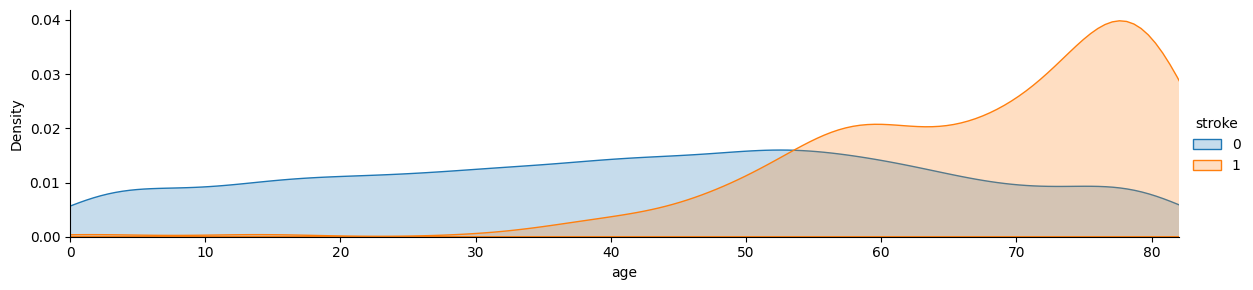

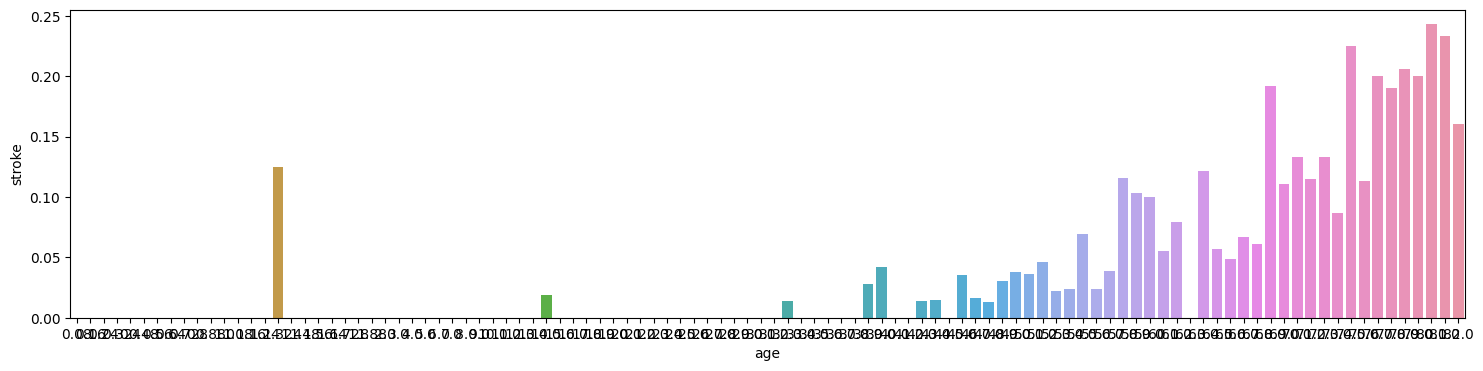

In [55]:
# peaks for stroke/no stroke by their age
facet = sns.FacetGrid(NUM_TAR_DF, hue="stroke",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, NUM_TAR_DF['age'].max()))
facet.add_legend()

# average stroke by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = NUM_TAR_DF[["age", "stroke"]].groupby(['age'],as_index=False).mean()
sns.barplot(x='age', y='stroke', data=average_age)

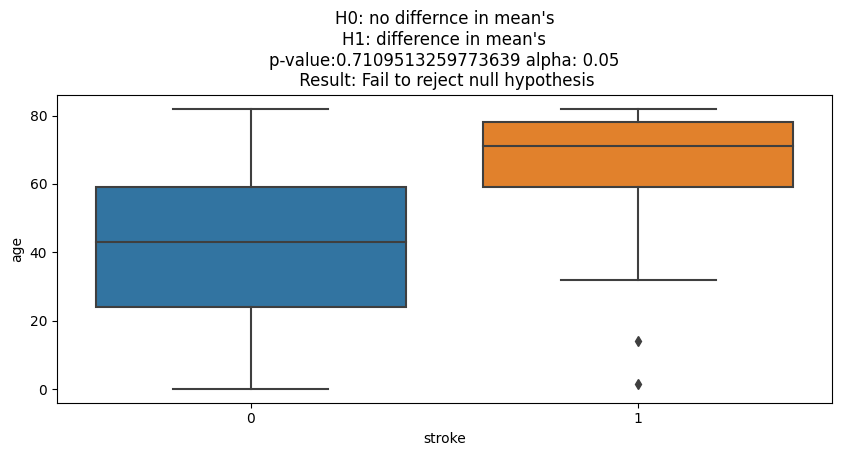

In [56]:
plot_t_test_results(NUM_TAR_DF, "stroke", "age")

**Conclusion:**

- age doesn't show any significant relation to stroke
- But there are outliers though.

#### 2. Stroke Vs Avg Glucose Level

In [57]:
NUM_TAR_DF.groupby('stroke')['avg_glucose_level'].agg(['mean', 'std'])

,mean,std
stroke,,
0,104.795513,43.846069
1,132.544739,61.921056


<Axes: xlabel='avg_glucose_level', ylabel='stroke'>

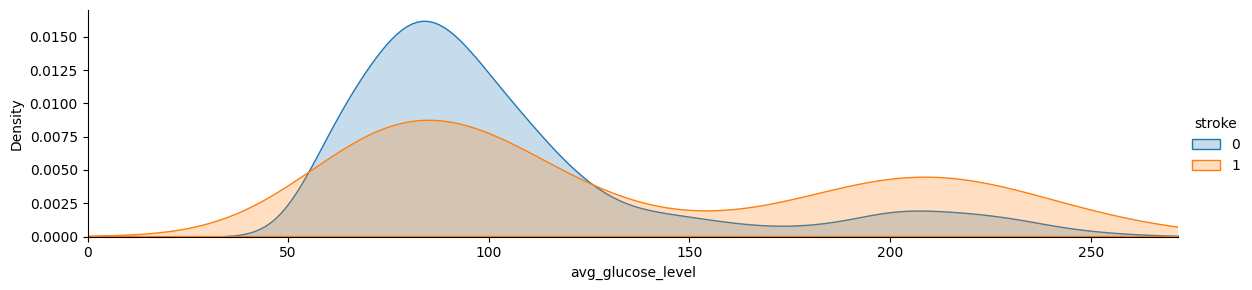

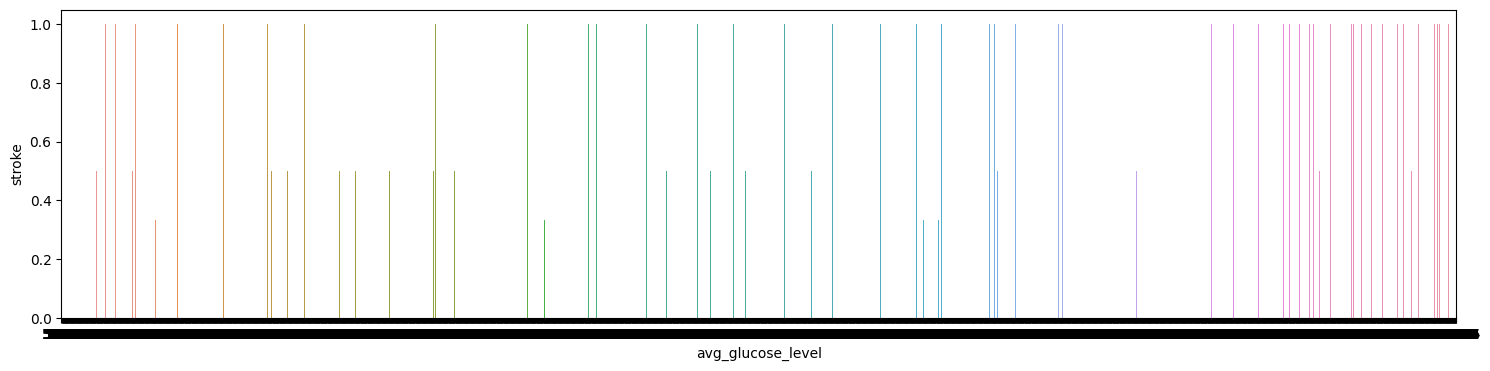

In [58]:
facet = sns.FacetGrid(NUM_TAR_DF, hue="stroke",aspect=4)
facet.map(sns.kdeplot,'avg_glucose_level',shade= True)
facet.set(xlim=(0, NUM_TAR_DF['avg_glucose_level'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_glc = NUM_TAR_DF[["avg_glucose_level", "stroke"]].groupby(['avg_glucose_level'],as_index=False).mean()
sns.barplot(x='avg_glucose_level', y='stroke', data=average_glc)

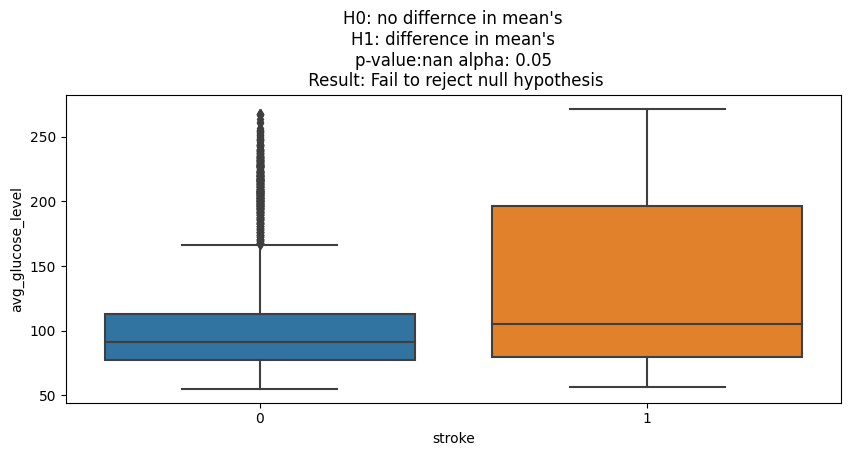

In [59]:
plot_t_test_results(NUM_TAR_DF, "stroke", "avg_glucose_level")

#### 3. Stroke Vs BMI

In [60]:
NUM_TAR_DF.groupby('stroke')['bmi'].agg(['mean', 'std'])

,mean,std
stroke,,
0,28.799115,7.777269
1,30.090361,5.861877


<Axes: xlabel='bmi', ylabel='stroke'>

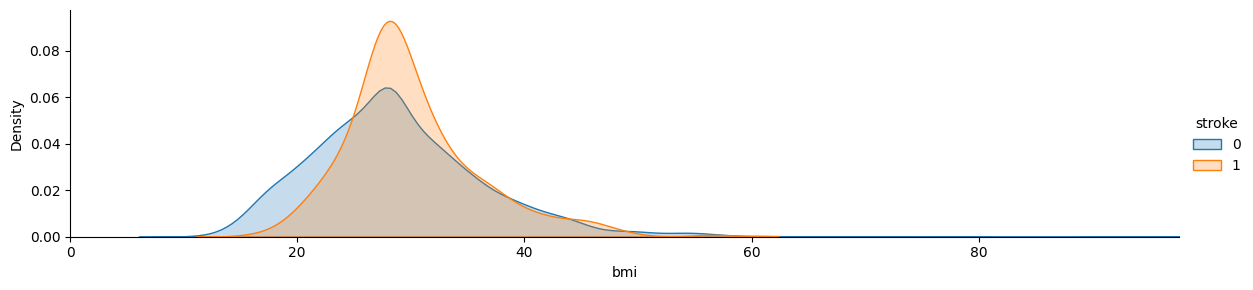

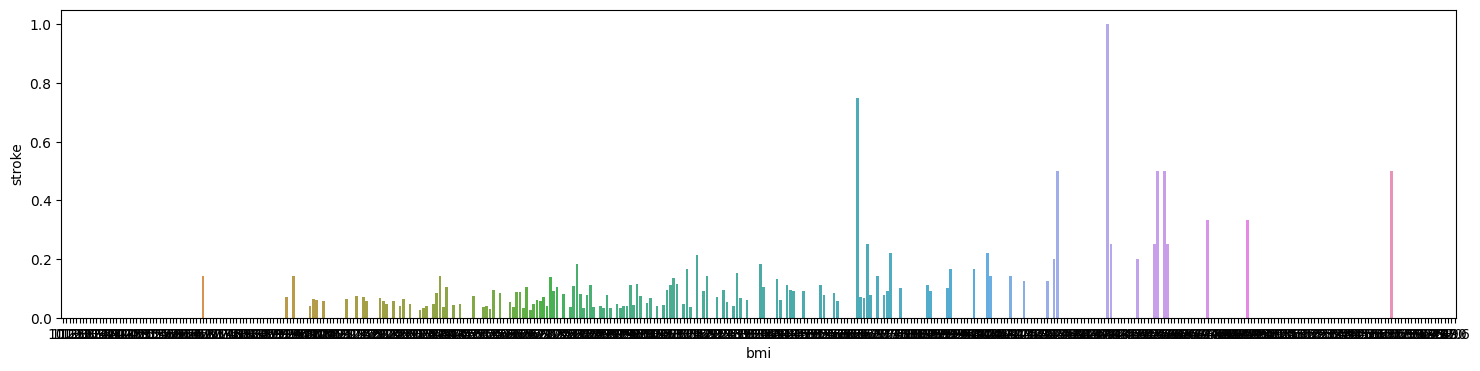

In [61]:
facet = sns.FacetGrid(NUM_TAR_DF, hue="stroke",aspect=4)
facet.map(sns.kdeplot,'bmi',shade= True)
facet.set(xlim=(0, NUM_TAR_DF['bmi'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_bmi = NUM_TAR_DF[["bmi", "stroke"]].groupby(['bmi'],as_index=False).mean()
sns.barplot(x='bmi', y='stroke', data=average_bmi)

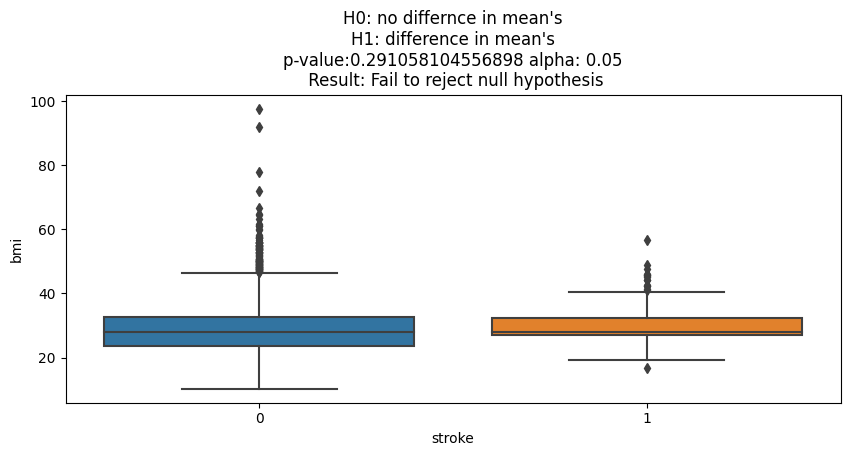

In [62]:
plot_t_test_results(NUM_TAR_DF, "stroke", "bmi")

### **Final Conclusion:**

**Feature** | **Relation with Stroke**
--- | ---
 Age | Yes
 Avg Glucose Level | No
 BMI | No

### 2. Target - Categorical

- Stroke Vs. Gender - categorical
- Stroke Vs. Hypertension - categorical
- Stroke Vs. Heart Disease - numerical
- Stroke Vs. Ever Married - numerical
- Stroke Vs. Work Type - categorical
- Stroke Vs. Residence Type - categorical
- Stroke Vs. Smoking Status - categorical


In [63]:
CAT_FEATURES

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [64]:
CAT_TAR_DF = df[CAT_FEATURES+TARGET_COL]

CAT_TAR_DF.nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
stroke            2
dtype: int64

In [65]:
CAT_TAR_DF.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1


In [66]:
from sklearn.preprocessing import LabelEncoder

# encoding gender
gender_encoder = LabelEncoder()
gender_encoder.fit(CAT_TAR_DF["gender"])
CAT_TAR_DF["gender_encoded"] = gender_encoder.transform(CAT_TAR_DF["gender"])
print("Mapping: ",dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_))))

# encoding ever married
married_encoder = LabelEncoder()
married_encoder.fit(CAT_TAR_DF["ever_married"])
CAT_TAR_DF["ever_married_encoded"] = married_encoder.transform(CAT_TAR_DF["ever_married"])
print("Mapping: ",dict(zip(married_encoder.classes_, married_encoder.transform(married_encoder.classes_))))

# encoding work_type
work_type_encoder = LabelEncoder()
work_type_encoder.fit(CAT_TAR_DF["work_type"])
CAT_TAR_DF["work_type_encoded"] = work_type_encoder.transform(CAT_TAR_DF["work_type"])
print("Mapping: ",dict(zip(work_type_encoder.classes_, work_type_encoder.transform(work_type_encoder.classes_))))

# encoding Residence_type
Residence_type_encoder = LabelEncoder()
Residence_type_encoder.fit(CAT_TAR_DF["Residence_type"])
CAT_TAR_DF["Residence_type_encoded"] = Residence_type_encoder.transform(CAT_TAR_DF["Residence_type"])
print("Mapping: ",dict(zip(Residence_type_encoder.classes_, Residence_type_encoder.transform(Residence_type_encoder.classes_))))

# encoding smoking_status
smoking_status_encoder = LabelEncoder()
smoking_status_encoder.fit(CAT_TAR_DF["smoking_status"])
CAT_TAR_DF["smoking_status_encoded"] = smoking_status_encoder.transform(CAT_TAR_DF["smoking_status"])
print("Mapping: ",dict(zip(smoking_status_encoder.classes_, smoking_status_encoder.transform(smoking_status_encoder.classes_))))


Mapping:  {'Female': 0, 'Male': 1, 'Other': 2}
Mapping:  {'No': 0, 'Yes': 1}
Mapping:  {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Mapping:  {'Rural': 0, 'Urban': 1}
Mapping:  {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [67]:
CAT_TAR_DF.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,1,1,2,1,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,0,1,3,0,2
2,Male,0,1,Yes,Private,Rural,never smoked,1,1,1,2,0,2
3,Female,0,0,Yes,Private,Urban,smokes,1,0,1,2,1,3
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,0,1,3,0,2


#### 1. Stroke Vs Gender

In [68]:
CAT_TAR_DF["stroke"].value_counts(normalize=True)*100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [69]:
pd.crosstab(CAT_TAR_DF["gender"], CAT_TAR_DF["stroke"], normalize=True) * 100

stroke,0,1
gender,,
Female,55.831703,2.759295
Male,39.275930,2.113503
Other,0.019569,0.000000


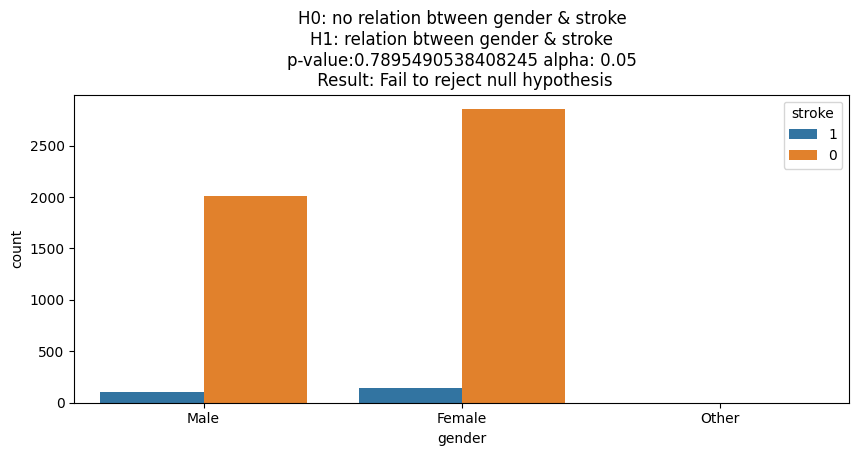

In [70]:
plot_bivariate(CAT_TAR_DF, "gender", "stroke")

- gender doesn't have any significant impact on stroke

#### 2. Stroke Vs. Hypertension

In [71]:
pd.crosstab(CAT_TAR_DF["stroke"], CAT_TAR_DF["hypertension"], normalize=True) * 100

hypertension,0,1
stroke,,
0,86.673190,8.454012
1,3.581213,1.291585


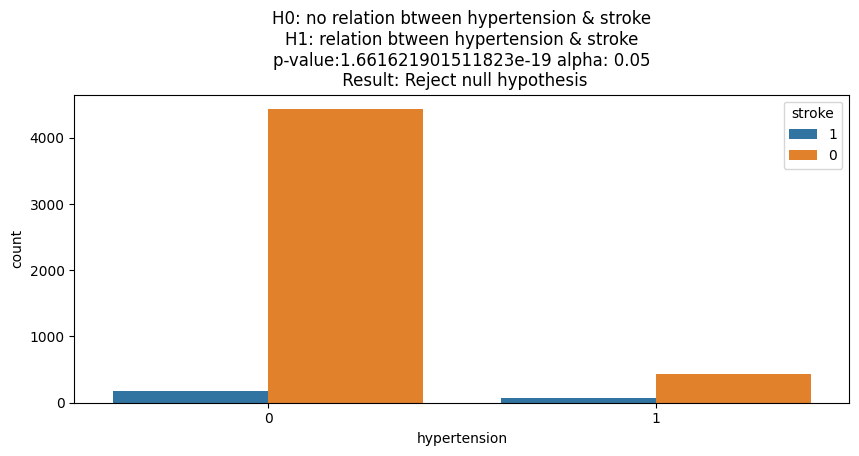

In [72]:
plot_bivariate(CAT_TAR_DF, "hypertension", "stroke")

- hypertenssion have relation with heart stroke

#### 3. Stroke Vs. Heart Disease

In [73]:
pd.crosstab(CAT_TAR_DF["stroke"], CAT_TAR_DF["heart_disease"], normalize=True) * 100

heart_disease,0,1
stroke,,
0,90.645793,4.481409
1,3.953033,0.919765


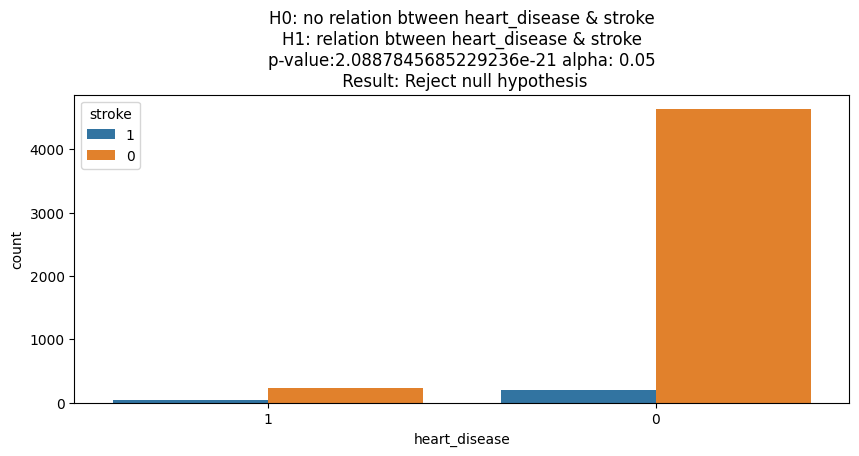

In [74]:
plot_bivariate(CAT_TAR_DF, "heart_disease", "stroke")

- heart disease has significant relation with heart stroke

#### 4. Stroke Vs. Ever Married

In [75]:
pd.crosstab(CAT_TAR_DF["stroke"], CAT_TAR_DF["ever_married"], normalize=True) * 100

ever_married,No,Yes
stroke,,
0,33.816047,61.311155
1,0.567515,4.305284


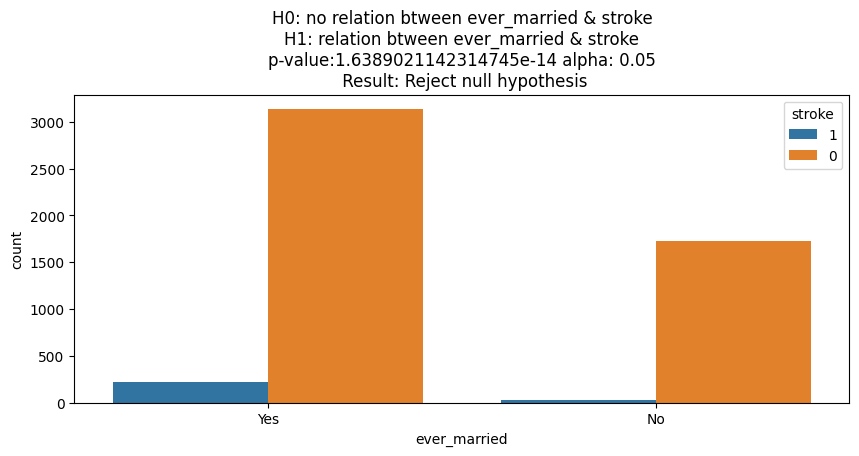

In [76]:
plot_bivariate(CAT_TAR_DF, "ever_married", "stroke")

- marrige has significant relation with heart stroke

#### 5. Stroke Vs. Work Type

In [77]:
pd.crosstab(CAT_TAR_DF["stroke"], CAT_TAR_DF["work_type"], normalize=True) * 100

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,12.211350,0.430528,54.324853,14.755382,13.405088
1,0.645793,0.000000,2.915851,1.272016,0.039139


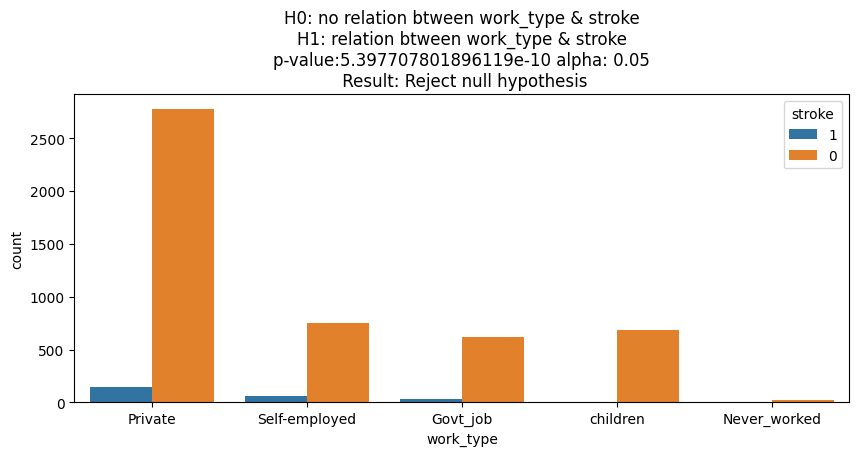

In [78]:
plot_bivariate(CAT_TAR_DF, "work_type", "stroke")

- type of work has significant relation with heart stroke

#### 6. Stroke Vs. Residence Type

In [79]:
pd.crosstab(CAT_TAR_DF["stroke"], CAT_TAR_DF["Residence_type"], normalize=True) * 100

Residence_type,Rural,Urban
stroke,,
0,46.966732,48.160470
1,2.230920,2.641879


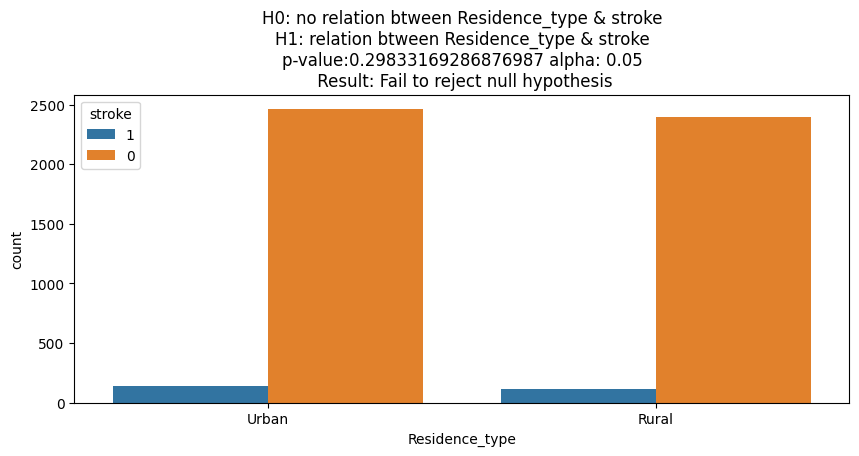

In [80]:
plot_bivariate(CAT_TAR_DF, "Residence_type", "stroke")

- residence is not having any significant relation with heart stroke

#### 7. Stroke Vs. Smoking Status

In [81]:
pd.crosstab(CAT_TAR_DF["stroke"], CAT_TAR_DF["smoking_status"], normalize=True) * 100

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,29.295499,15.949119,35.264188,14.618395
1,0.919765,1.369863,1.761252,0.821918


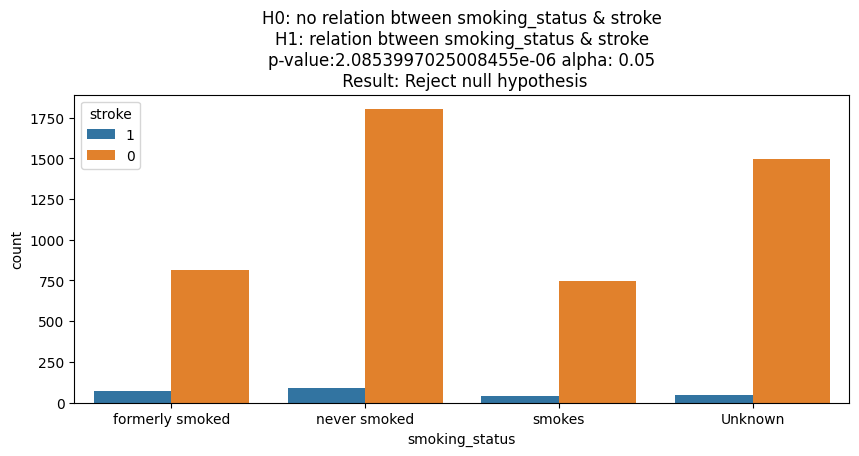

In [82]:
plot_bivariate(CAT_TAR_DF, "smoking_status", "stroke")

- smoking status has significant relation with heart stroke

### **Final Conclusion:**

**Feature** | **Relation with Stroke**
--- | ---
 Gender | No
 Hypertension | Yes
 Heart Disease | Yes
 Ever Married | Yes
 Work Type | Yes
 Residence Type | No
 Smoking Status | Yes

### 3. Numerical - Numerical - Target

- age
- avg_glucose_level
- bmi

In [83]:
NUM_NUM = NUM_FEATURES + TARGET_COL

In [84]:
NUM_NUM_DF = df[NUM_NUM].copy()

In [85]:
NUM_NUM_DF.isna().sum()

age                  0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

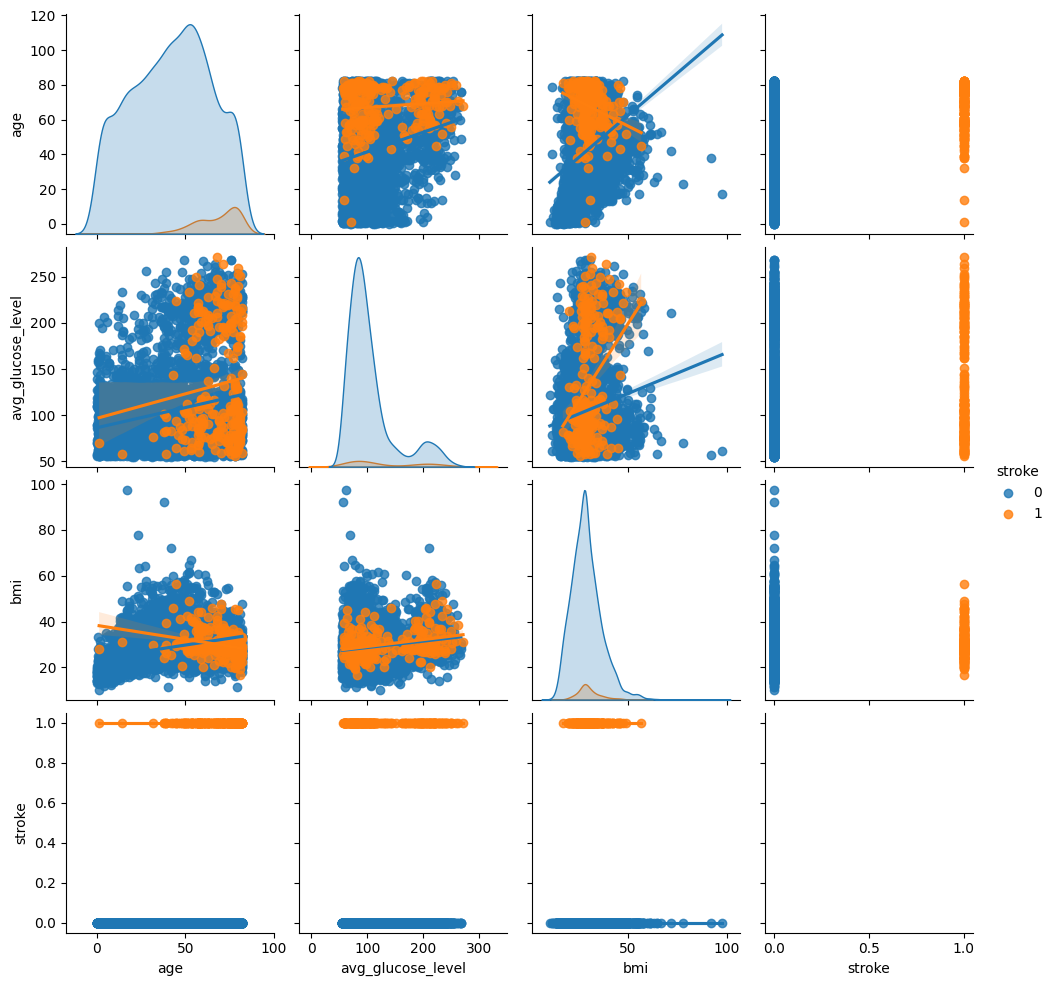

In [86]:
# sns.pairplot(data=df,vars=NUM_NUM)
sns.pairplot(data=NUM_NUM_DF,vars=NUM_NUM, hue=TARGET_COL[0], kind='reg', diag_kind = 'kde')

In [87]:
method : {'pearson', 'kendall', 'spearman'}

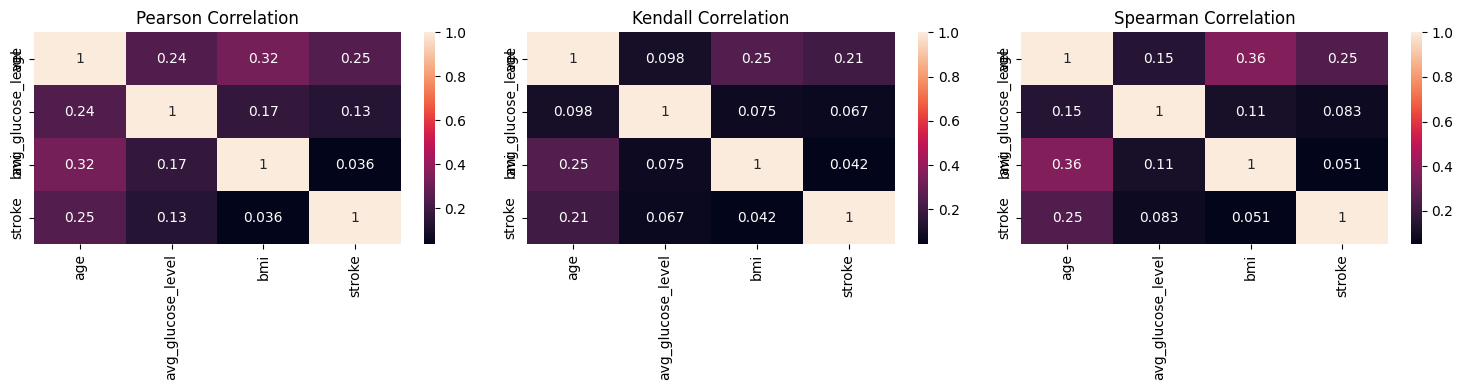

In [88]:
df_corr_person = NUM_NUM_DF[NUM_NUM].corr(method='pearson') # assumption : if data had linear relation : parametric
df_corr_kendall = NUM_NUM_DF[NUM_NUM].corr(method='kendall') # two categorical variables
df_corr_spearman = NUM_NUM_DF[NUM_NUM].corr(method='spearman') # assumption : if data had non linear relation : non-parametric

fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.heatmap(df_corr_person, annot=True, ax=axes[0])
axes[0].set_title("Pearson Correlation")

sns.heatmap(df_corr_kendall, annot=True, ax=axes[1])
axes[1].set_title("Kendall Correlation")

sns.heatmap(df_corr_spearman, annot=True, ax=axes[2])
axes[2].set_title("Spearman Correlation")

plt.tight_layout()
plt.show()

In [89]:
palette = sns.color_palette("Set2")

#### 1. Age vs avg_glucose_level vs stroke

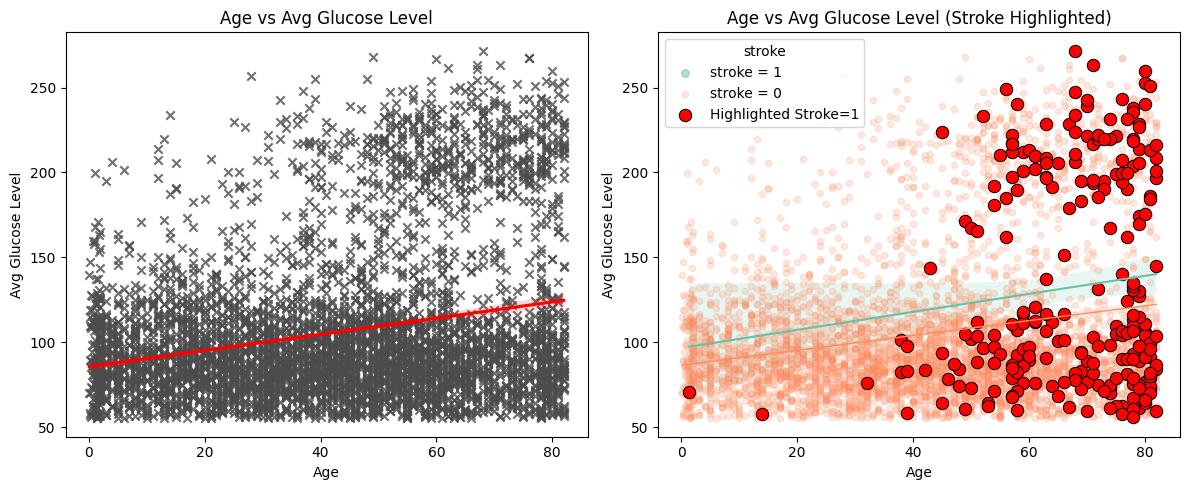

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- First Plot: Basic regression ---
sns.regplot(
    data=NUM_NUM_DF, x="age", y="avg_glucose_level",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
    ax=axs[0]
)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Avg Glucose Level")
axs[0].set_title("Age vs Avg Glucose Level")

# --- Second Plot: Grouped regplots for stroke groups ---
for i, hue_value in enumerate(NUM_NUM_DF[TARGET_COL[0]].unique()):
    subset = NUM_NUM_DF[NUM_NUM_DF[TARGET_COL[0]] == hue_value]

    stroke_highlight = (hue_value == 1)
    sns.regplot(
        data=subset,
        x="age", y="avg_glucose_level",
        ax=axs[1],
        label=f"stroke = {hue_value}",
        color=palette[i],
        scatter_kws={
            's': 30 if stroke_highlight else 20,
            'alpha': 0.2 if not stroke_highlight else 0.5,
            'marker': 'x'
        },
        line_kws={'linewidth': 1.5 if stroke_highlight else 1}
    )

# --- Overlay Scatter Plot: Stroke = 1 ---
stroke_df = NUM_NUM_DF[NUM_NUM_DF[TARGET_COL[0]] == 1]
sns.scatterplot(
    data=stroke_df,
    x="age", y="avg_glucose_level",
    ax=axs[1],
    color="red",      # Overriding to clearly highlight
    edgecolor="black",
    s=80,
    marker="o",
    label="Highlighted Stroke=1"
)

axs[1].legend(title=TARGET_COL[0])
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Avg Glucose Level")
axs[1].set_title("Age vs Avg Glucose Level (Stroke Highlighted)")

plt.tight_layout()
plt.show()


- after age > `40` and for different glucose levels heart stroke is possible

#### 2. Age vs bmi vs stroke

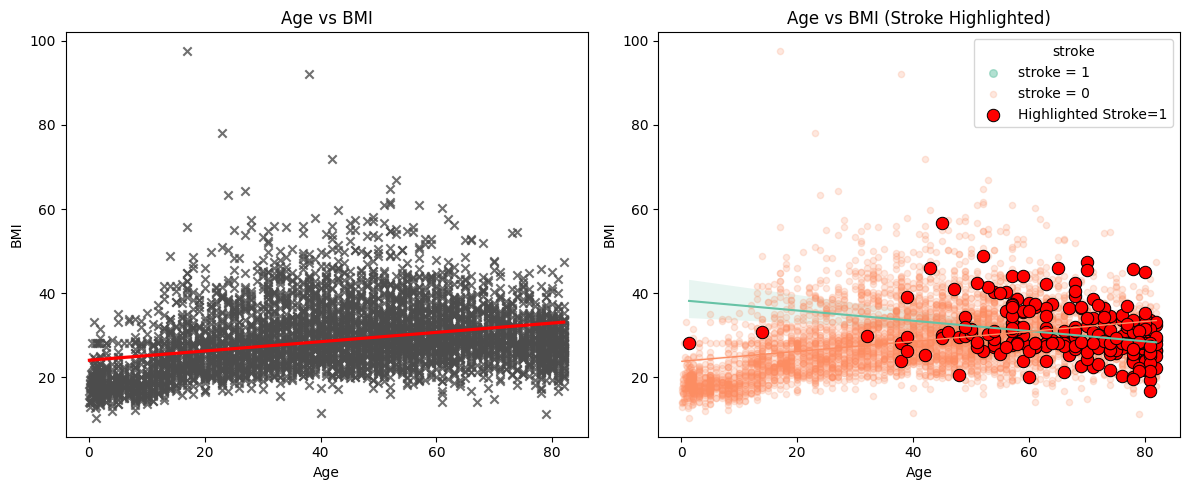

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- First Plot: Basic regression ---
sns.regplot(
    data=NUM_NUM_DF, x="age", y="bmi",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
    ax=axs[0]
)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("BMI")
axs[0].set_title("Age vs BMI")

# --- Second Plot: Grouped regplots for stroke groups ---
for i, hue_value in enumerate(NUM_NUM_DF[TARGET_COL[0]].unique()):
    subset = NUM_NUM_DF[NUM_NUM_DF[TARGET_COL[0]] == hue_value]

    stroke_highlight = (hue_value == 1)
    sns.regplot(
        data=subset,
        x="age", y="bmi",
        ax=axs[1],
        label=f"stroke = {hue_value}",
        color=palette[i],
        scatter_kws={
            's': 30 if stroke_highlight else 20,
            'alpha': 0.2 if not stroke_highlight else 0.5,
            'marker': 'x'
        },
        line_kws={'linewidth': 1.5 if stroke_highlight else 1}
    )

# --- Overlay Scatter Plot: Stroke = 1 ---
stroke_df = NUM_NUM_DF[NUM_NUM_DF[TARGET_COL[0]] == 1]
sns.scatterplot(
    data=stroke_df,
    x="age", y="bmi",
    ax=axs[1],
    color="red",      # Overriding to clearly highlight
    edgecolor="black",
    s=80,
    marker="o",
    label="Highlighted Stroke=1"
)

axs[1].legend(title=TARGET_COL[0])
axs[1].set_xlabel("Age")
axs[1].set_ylabel("BMI")
axs[1].set_title("Age vs BMI (Stroke Highlighted)")

plt.tight_layout()
plt.show()


#### 3. Avg GL vs bmi vs stroke

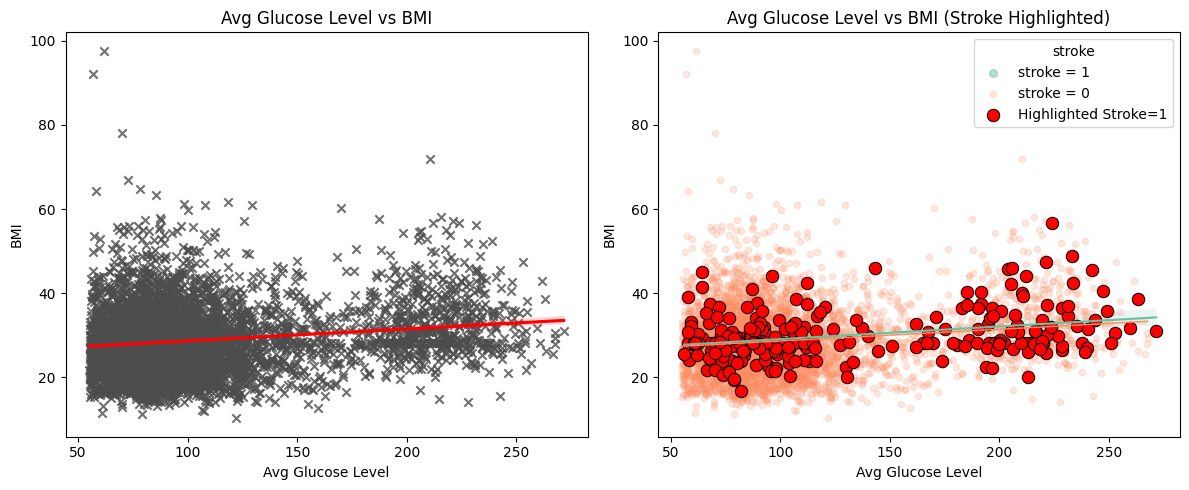

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- First Plot: Basic regression ---
sns.regplot(
    data=NUM_NUM_DF, x="avg_glucose_level", y="bmi",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
    ax=axs[0]
)
axs[0].set_xlabel("Avg Glucose Level")
axs[0].set_ylabel("BMI")
axs[0].set_title("Avg Glucose Level vs BMI")

# --- Second Plot: Grouped regplots for stroke groups ---
for i, hue_value in enumerate(NUM_NUM_DF[TARGET_COL[0]].unique()):
    subset = NUM_NUM_DF[NUM_NUM_DF[TARGET_COL[0]] == hue_value]

    stroke_highlight = (hue_value == 1)
    sns.regplot(
        data=subset,
        x="avg_glucose_level", y="bmi",
        ax=axs[1],
        label=f"stroke = {hue_value}",
        color=palette[i],
        scatter_kws={
            's': 30 if stroke_highlight else 20,
            'alpha': 0.2 if not stroke_highlight else 0.5,
            'marker': 'x'
        },
        line_kws={'linewidth': 1.5 if stroke_highlight else 1}
    )

# --- Overlay Scatter Plot: Stroke = 1 ---
stroke_df = NUM_NUM_DF[NUM_NUM_DF[TARGET_COL[0]] == 1]
sns.scatterplot(
    data=stroke_df,
    x="avg_glucose_level", y="bmi",
    ax=axs[1],
    color="red",      # Overriding to clearly highlight
    edgecolor="black",
    s=80,
    marker="o",
    label="Highlighted Stroke=1"
)

axs[1].legend(title=TARGET_COL[0])
axs[1].set_xlabel("Avg Glucose Level")
axs[1].set_ylabel("BMI")
axs[1].set_title("Avg Glucose Level vs BMI (Stroke Highlighted)")

plt.tight_layout()
plt.show()


### 4. Categorical - Categorical - Target

In [93]:
TARGET_COL

['stroke']

In [94]:
CAT_FEATURES

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [95]:
CAT_TAR_DF.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,1,1,2,1,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,0,1,3,0,2
2,Male,0,1,Yes,Private,Rural,never smoked,1,1,1,2,0,2
3,Female,0,0,Yes,Private,Urban,smokes,1,0,1,2,1,3
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,0,1,3,0,2


In [96]:
CAT_CAT_ENCODED = ["gender_encoded", "hypertension", "heart_disease",
"ever_married_encoded", "work_type_encoded", "Residence_type_encoded", "smoking_status_encoded"] + TARGET_COL

In [97]:
CAT_CAT_DF = CAT_TAR_DF[CAT_CAT_ENCODED].copy()

- gender (nominal) - categorical
- hypertension (nominal) - categorical
- heart_disease (nominal) - categorical
- ever_married (nominal) - categorical
- work_type (nominal) - categorical
- Residence_type (nominal) - categorical
- smoking_status (nominal) - categorical


In [98]:
CAT_TAR_DF[CAT_CAT_ENCODED].nunique()

gender_encoded            3
hypertension              2
heart_disease             2
ever_married_encoded      2
work_type_encoded         5
Residence_type_encoded    2
smoking_status_encoded    4
stroke                    2
dtype: int64

In [99]:
for i in CAT_CAT_ENCODED:
    if CAT_TAR_DF[i].nunique() <= 10:
        print(i," : ",CAT_TAR_DF[i].unique())
    else:
        print(i," : ",CAT_TAR_DF[i].nunique())

gender_encoded  :  [1 0 2]
hypertension  :  [0 1]
heart_disease  :  [1 0]
ever_married_encoded  :  [1 0]
work_type_encoded  :  [2 3 0 4 1]
Residence_type_encoded  :  [1 0]
smoking_status_encoded  :  [1 2 3 0]
stroke  :  [1 0]


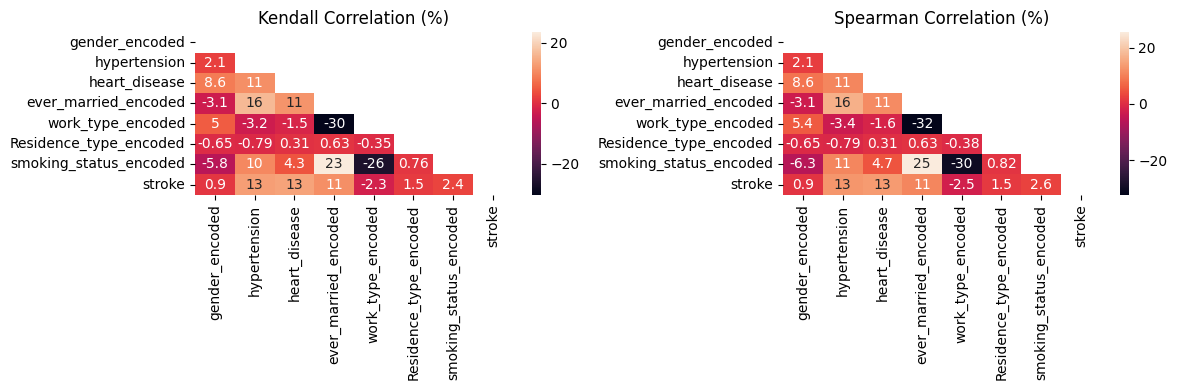

In [100]:
df_corr_kendall = CAT_TAR_DF[CAT_CAT_ENCODED].corr(method='kendall') * 100 # rank based 
df_corr_spearman = CAT_TAR_DF[CAT_CAT_ENCODED].corr(method='spearman') * 100 # non parametric

# creating mask
matrix = df_corr_kendall.corr()

mask = np.zeros_like(matrix)

mask[np.triu_indices_from(mask)] = True

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.heatmap(df_corr_kendall, annot=True, ax=axes[0], mask=mask)
axes[0].set_title("Kendall Correlation (%)")

sns.heatmap(df_corr_spearman, annot=True, ax=axes[1], mask=mask)
axes[1].set_title("Spearman Correlation (%)")

plt.tight_layout()
plt.show()

- work_type vs ever_married - `inter-correlation`
- work_type vs smoking_status - `inter-correlation`
- ever_married vs smoking_status - `inter-correlation`
- ever_married vs hypertension - `inter-correlation`

#### 1. work_type vs ever_married vs stroke

Text(0.5, 1.0, 'How many married vs. unmarried people are in each work type')

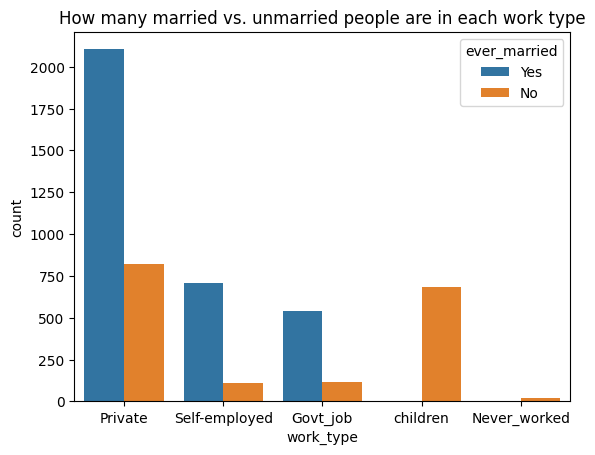

In [101]:
sns.countplot(CAT_TAR_DF, x="work_type", hue="ever_married")
plt.title("How many married vs. unmarried people are in each work type")

- Most people in `Private`, `Self-employed`, `Govt_job` are married

- A large portion of children are unsurprisingly not married

- Never_worked group is very small

#### 2. work_type vs smoking_status vs stroke

<Axes: xlabel='smoking_status', ylabel='count'>

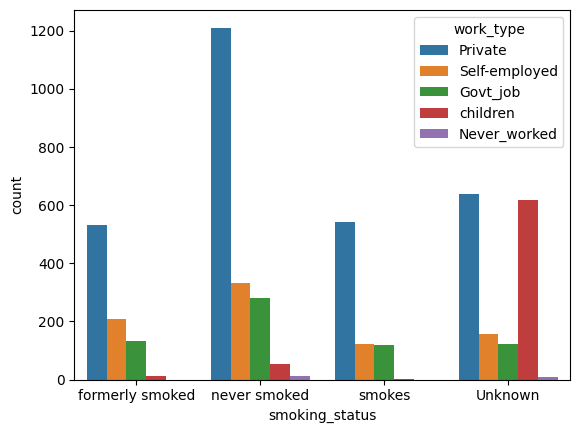

In [102]:
# sns.countplot(CAT_TAR_DF, x="work_type", hue="smoking_status")
sns.countplot(CAT_TAR_DF, x="smoking_status", hue="work_type")
# plt.title("How many married vs. unmarried people are in each work type")

#### 3. ever_married vs smoking_status - `inter-correlation`


<Axes: xlabel='smoking_status', ylabel='count'>

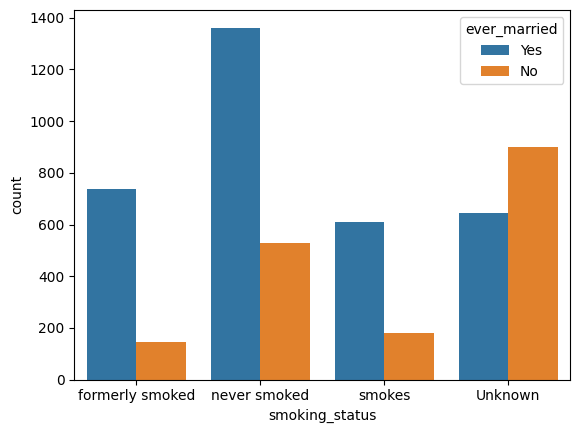

In [103]:
sns.countplot(CAT_TAR_DF, x="smoking_status", hue="ever_married")
# plt.title("How many married vs. unmarried people are in each work type")

#### 4. ever_married vs hypertension - `inter-correlation`

<Axes: xlabel='ever_married', ylabel='count'>

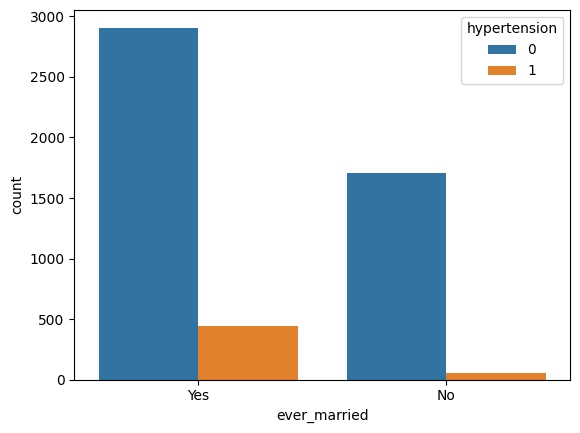

In [104]:
sns.countplot(CAT_TAR_DF, x="ever_married", hue="hypertension")
# plt.title("How many married vs. unmarried people are in each work type")

- married people are more hypertensed as compared to unmarrieds

### 5. Numerical - Categorical - Target

In [105]:
NUM_CAT_DF = pd.concat([NUM_TAR_DF.drop("stroke", axis=1), CAT_TAR_DF], axis=1)

- age
- avg_glucose_level
- bmi

- stroke (Target)

- gender
- hypertension
- heart_disease
- ever_married
- work_type
- Residence_type
- smoking_status

#### Age vs Gender vs Stroke

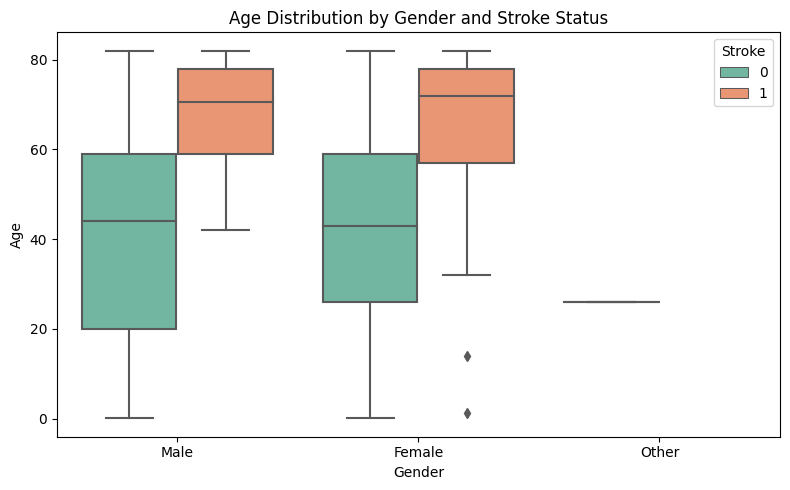

In [106]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=NUM_CAT_DF,
    x="gender",
    y="age",
    hue="stroke",  # This splits each gender group by stroke=0 and stroke=1
    palette="Set2"
)

plt.title("Age Distribution by Gender and Stroke Status")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.legend(title="Stroke")
plt.tight_layout()
plt.show()

#### Age vs Hypertension vs Stroke

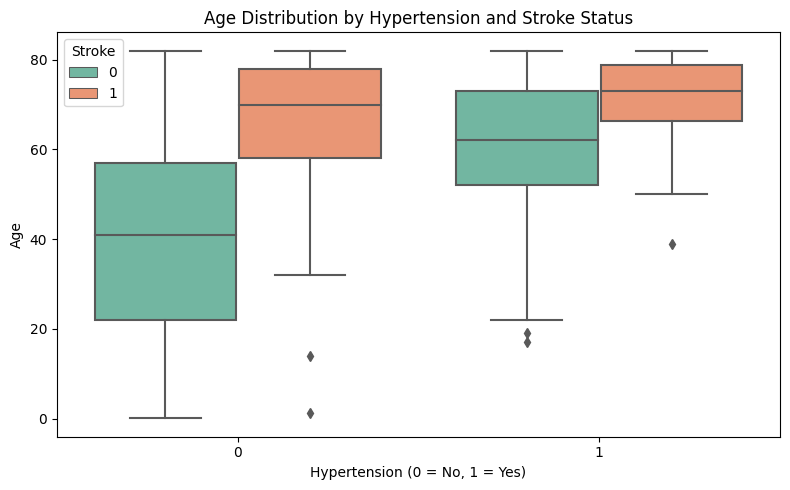

In [107]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=NUM_CAT_DF,
    x="hypertension",   # 0 = no hypertension, 1 = has hypertension
    y="age",
    hue="stroke",       # Stroke status shown as different-colored boxes
    palette="Set2"
)

plt.title("Age Distribution by Hypertension and Stroke Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.legend(title="Stroke")
plt.tight_layout()
plt.show()

#### Age vs Heart Disease vs Stroke

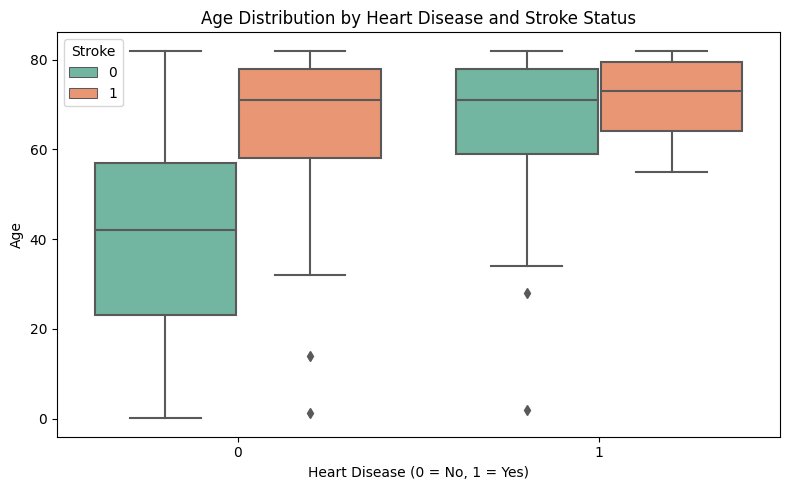

In [108]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=NUM_CAT_DF,
    x="heart_disease",   # 0 = No heart disease, 1 = Has heart disease
    y="age",
    hue="stroke",        # Stroke = 0 or 1
    palette="Set2"
)

plt.title("Age Distribution by Heart Disease and Stroke Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.legend(title="Stroke")
plt.tight_layout()
plt.show()

#### Age vs Ever Married vs Stroke

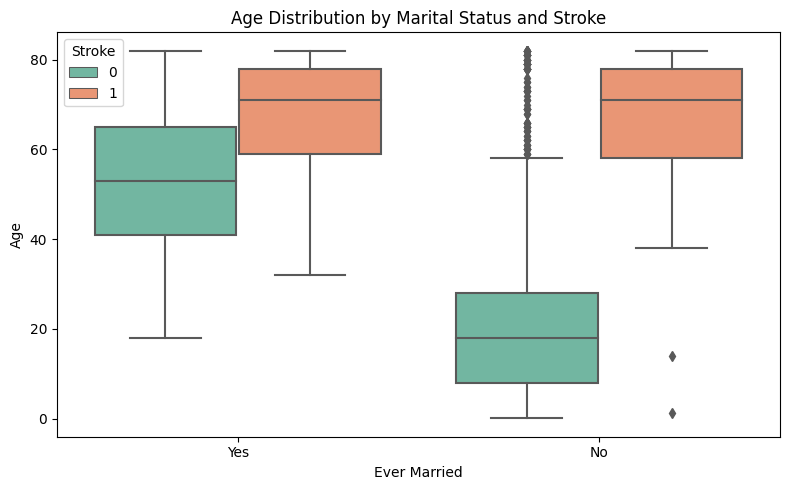

In [109]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=NUM_CAT_DF,
    x="ever_married",     # "Yes" or "No"
    y="age",
    hue="stroke",         # Split by stroke status
    palette="Set2"
)

plt.title("Age Distribution by Marital Status and Stroke")
plt.xlabel("Ever Married")
plt.ylabel("Age")
plt.legend(title="Stroke")
plt.tight_layout()
plt.show()

#### Age vs Work Type vs Stroke

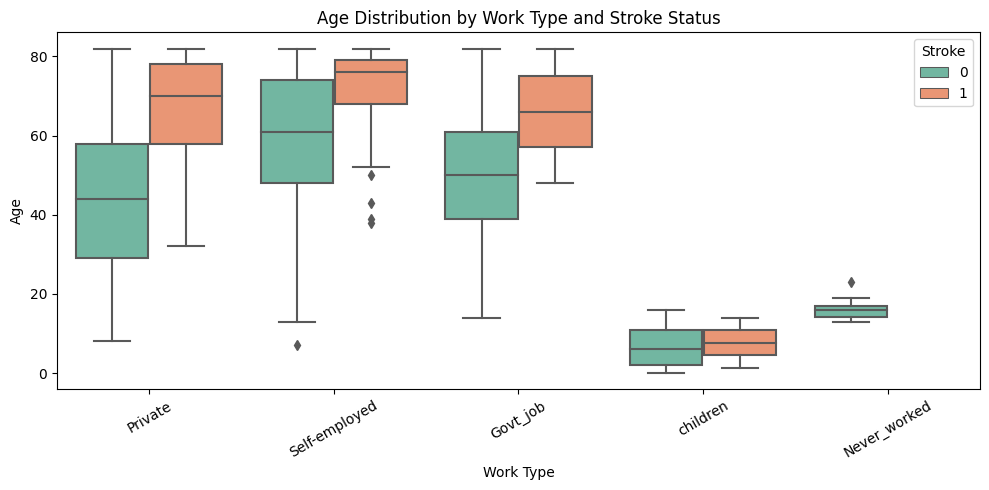

In [110]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=NUM_CAT_DF,
    x="work_type",      # Different categories like 'Private', 'Self-employed', etc.
    y="age",
    hue="stroke",       # Stroke status: 0 = No, 1 = Yes
    palette="Set2"
)

plt.title("Age Distribution by Work Type and Stroke Status")
plt.xlabel("Work Type")
plt.ylabel("Age")
plt.legend(title="Stroke")
plt.xticks(rotation=30)  # Rotate x labels if they're long
plt.tight_layout()
plt.show()

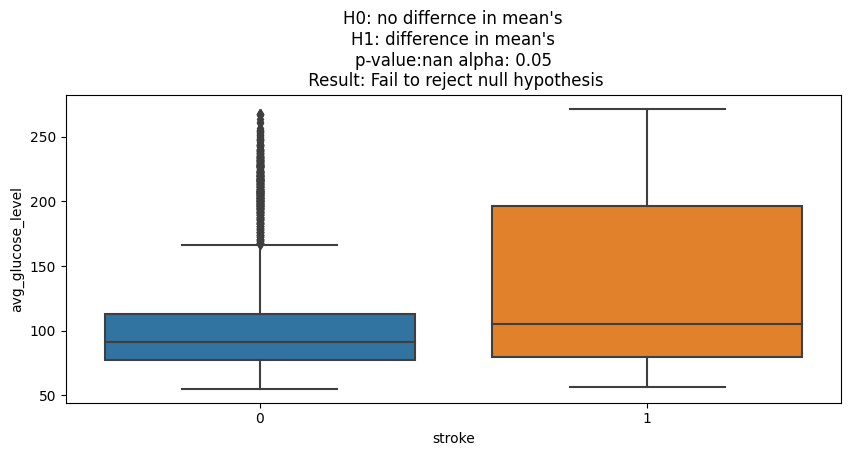

In [111]:
plot_t_test_results(NUM_TAR_DF, "stroke", "avg_glucose_level")

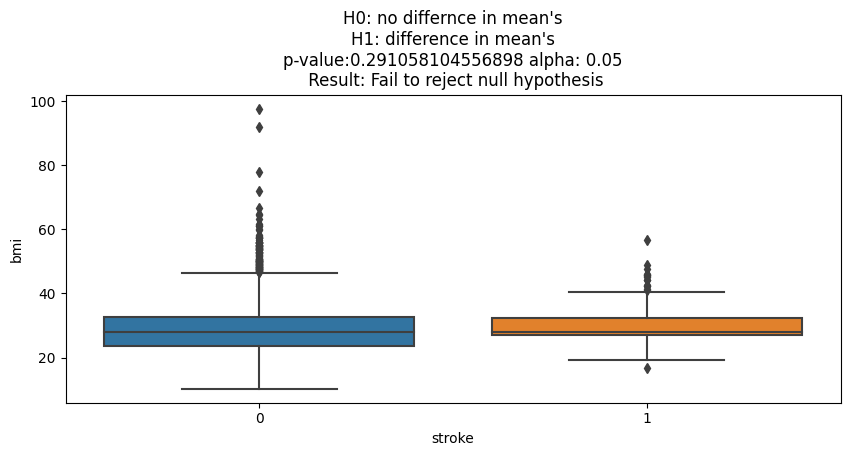

In [112]:
plot_t_test_results(NUM_TAR_DF, "stroke", "bmi")

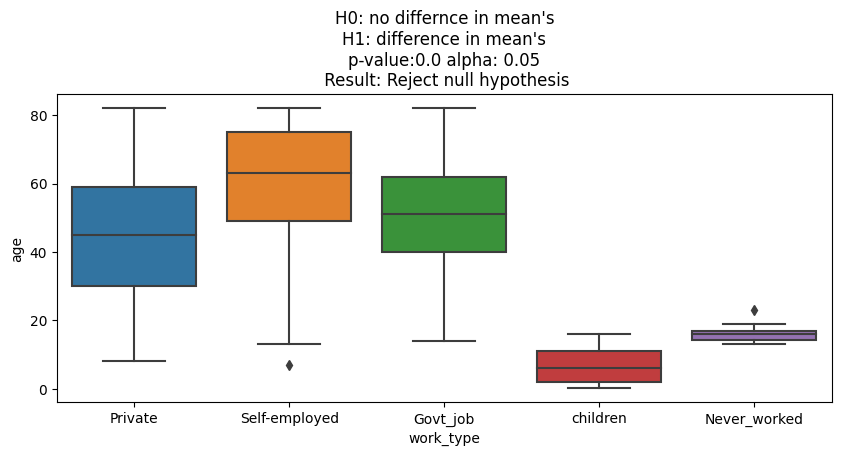

In [113]:
plot_ANOVA_results(df, "work_type", "age")

In [118]:
NUM_CAT_DF.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,67.0,228.69,36.6,Male,0,1,Yes,Private,Urban,formerly smoked,1,1,1,2,1,1
1,61.0,202.21,28.1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,0,1,3,0,2
2,80.0,105.92,32.5,Male,0,1,Yes,Private,Rural,never smoked,1,1,1,2,0,2
3,49.0,171.23,34.4,Female,0,0,Yes,Private,Urban,smokes,1,0,1,2,1,3
4,79.0,174.12,24.0,Female,1,0,Yes,Self-employed,Rural,never smoked,1,0,1,3,0,2


## Save Data : Optinal

In [120]:
NUM_CAT_DF.to_csv(os.path.join("data", "heart_stroke_semi_clean_data.csv"), index=False)